# 📘 Law School Bar Passage Dataset Documentation

## 🎯 Project Goal
The main goal of this project is to **predict whether a student will pass the bar exam (`pass_bar`)** using classical machine learning models, while paying special attention to **bias, fairness, and ethical AI considerations**.

We want to ensure that:
- The model is accurate.
- The model does not discriminate against students based on **sensitive attributes** such as race, gender, or family income.
- We audit the model predictions across different subgroups to detect unfairness.

---

## 📊 Dataset Overview
- **Rows:** ~22,400 students
- **Columns:** 29 after dropping leakage/unnecessary ones
- **Source:** Law School Admission Council (LSAC) Bar Passage Study

---

## 📑 Metadata: Column Descriptions

### Student Information
- **lsat (float):** LSAT exam score, standardized law school admission test.
- **ugpa (float):** Undergraduate GPA before law school.
- **gpa (float):** Cumulative GPA during law school.
- **zfygpa (float):** Standardized 1st-year GPA.
- **zgpa (float):** Standardized overall GPA.
- **age (float):** Student’s age (corrected from negative values).
- **sex (float):** Encoded gender variable (numeric).
- **gender (object):** Categorical gender ("male"/"female").  
  ⚠️ Sensitive attribute → not for model training, only fairness audit.
- **fam_inc (float):** Family income. ⚠️ Sensitive (proxy for socioeconomic bias).

### Enrollment Status
- **fulltime (float):** Full-time enrollment flag (1=yes, 0=no).
- **parttime (float):** Part-time enrollment flag (1=yes, 0=no).
- **tier (float):** Tier of the law school (prestige/quality measure).
- **cluster (float):** LSAC-defined cluster (groups of schools/students).

### Race/Ethnicity Variables
- **race (float):** Numeric race code.
- **race1 (object):** Race label (e.g., white, black, asian, hisp, other).
- **race2 (object):** Alternative grouping of race categories.
- **asian, black, hisp, other (int):** One-hot encoded race flags.  
  ⚠️ Sensitive attributes → excluded from training, used for fairness audit.

### Target Variable
- **pass_bar (float):**  
  - `1 = Student passed the bar exam`  
  - `0 = Student did not pass`

This is the **target column** for prediction.

### Extra / Less Useful Columns
- **index6040, indxgrp, indxgrp2 (float/object):** Grouping/indexing variables from the dataset. More metadata than predictive features; usually dropped or carefully validated before use.

---

## ⚠️ Notes on Bias and Fairness
- **Sensitive Attributes:** Race (`race`, `race1`, `race2`, `asian`, `black`, `hisp`, `other`), Gender (`sex`, `gender`), Family Income (`fam_inc`), and Tier (`tier`) can encode structural biases.
- Best practice:  
  - Do **not** use these directly in training.  
  - Keep them for **fairness auditing** (checking if predictions are biased).  

---

## ✅ Task Summary
- **Input:** Academic features (LSAT, GPA, enrollment status, etc.).  
- **Output/Target:** `pass_bar` → Predict if the student will pass the bar exam.  
- **Focus:** Build fair ML models → audit predictions for bias → propose mitigation techniques.


In [276]:
import pandas as pd

In [277]:
data = pd.read_csv('pass_prediction.csv')
df = data.copy()
df.head()

,Unnamed: 0,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,...,black,hisp,pass_bar,bar,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,...,0,0,1.0,a Passed 1st time,4.0,886.842082,g 700+,i 820+,0.979804,3.5
1,1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,...,0,0,1.0,a Passed 1st time,2.0,649.999987,f 640-700,f 640-700,0.979804,3.5
2,2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,...,0,0,1.0,a Passed 1st time,3.0,760.526298,g 700+,h 760-820,0.979804,3.5
3,3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,...,0,0,1.0,a Passed 1st time,3.0,807.894717,g 700+,h 760-820,0.979804,3.5
4,4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,...,0,0,1.0,a Passed 1st time,5.0,949.999974,g 700+,i 820+,0.979804,3.5


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22407 entries, 0 to 22406
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               22407 non-null  int64  
 1   decile1b                 20803 non-null  float64
 2   decile3                  20803 non-null  float64
 3   ID                       22407 non-null  int64  
 4   decile1                  21315 non-null  float64
 5   sex                      22402 non-null  float64
 6   race                     22391 non-null  float64
 7   cluster                  22311 non-null  float64
 8   lsat                     22407 non-null  float64
 9   ugpa                     22407 non-null  float64
 10  zfygpa                   21423 non-null  float64
 11  DOB_yr                   22357 non-null  float64
 12  grad                     22404 non-null  object 
 13  zgpa                     21118 non-null  float64
 14  bar1                  

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22407 entries, 0 to 22406
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               22407 non-null  int64  
 1   decile1b                 20803 non-null  float64
 2   decile3                  20803 non-null  float64
 3   ID                       22407 non-null  int64  
 4   decile1                  21315 non-null  float64
 5   sex                      22402 non-null  float64
 6   race                     22391 non-null  float64
 7   cluster                  22311 non-null  float64
 8   lsat                     22407 non-null  float64
 9   ugpa                     22407 non-null  float64
 10  zfygpa                   21423 non-null  float64
 11  DOB_yr                   22357 non-null  float64
 12  grad                     22404 non-null  object 
 13  zgpa                     21118 non-null  float64
 14  bar1                  

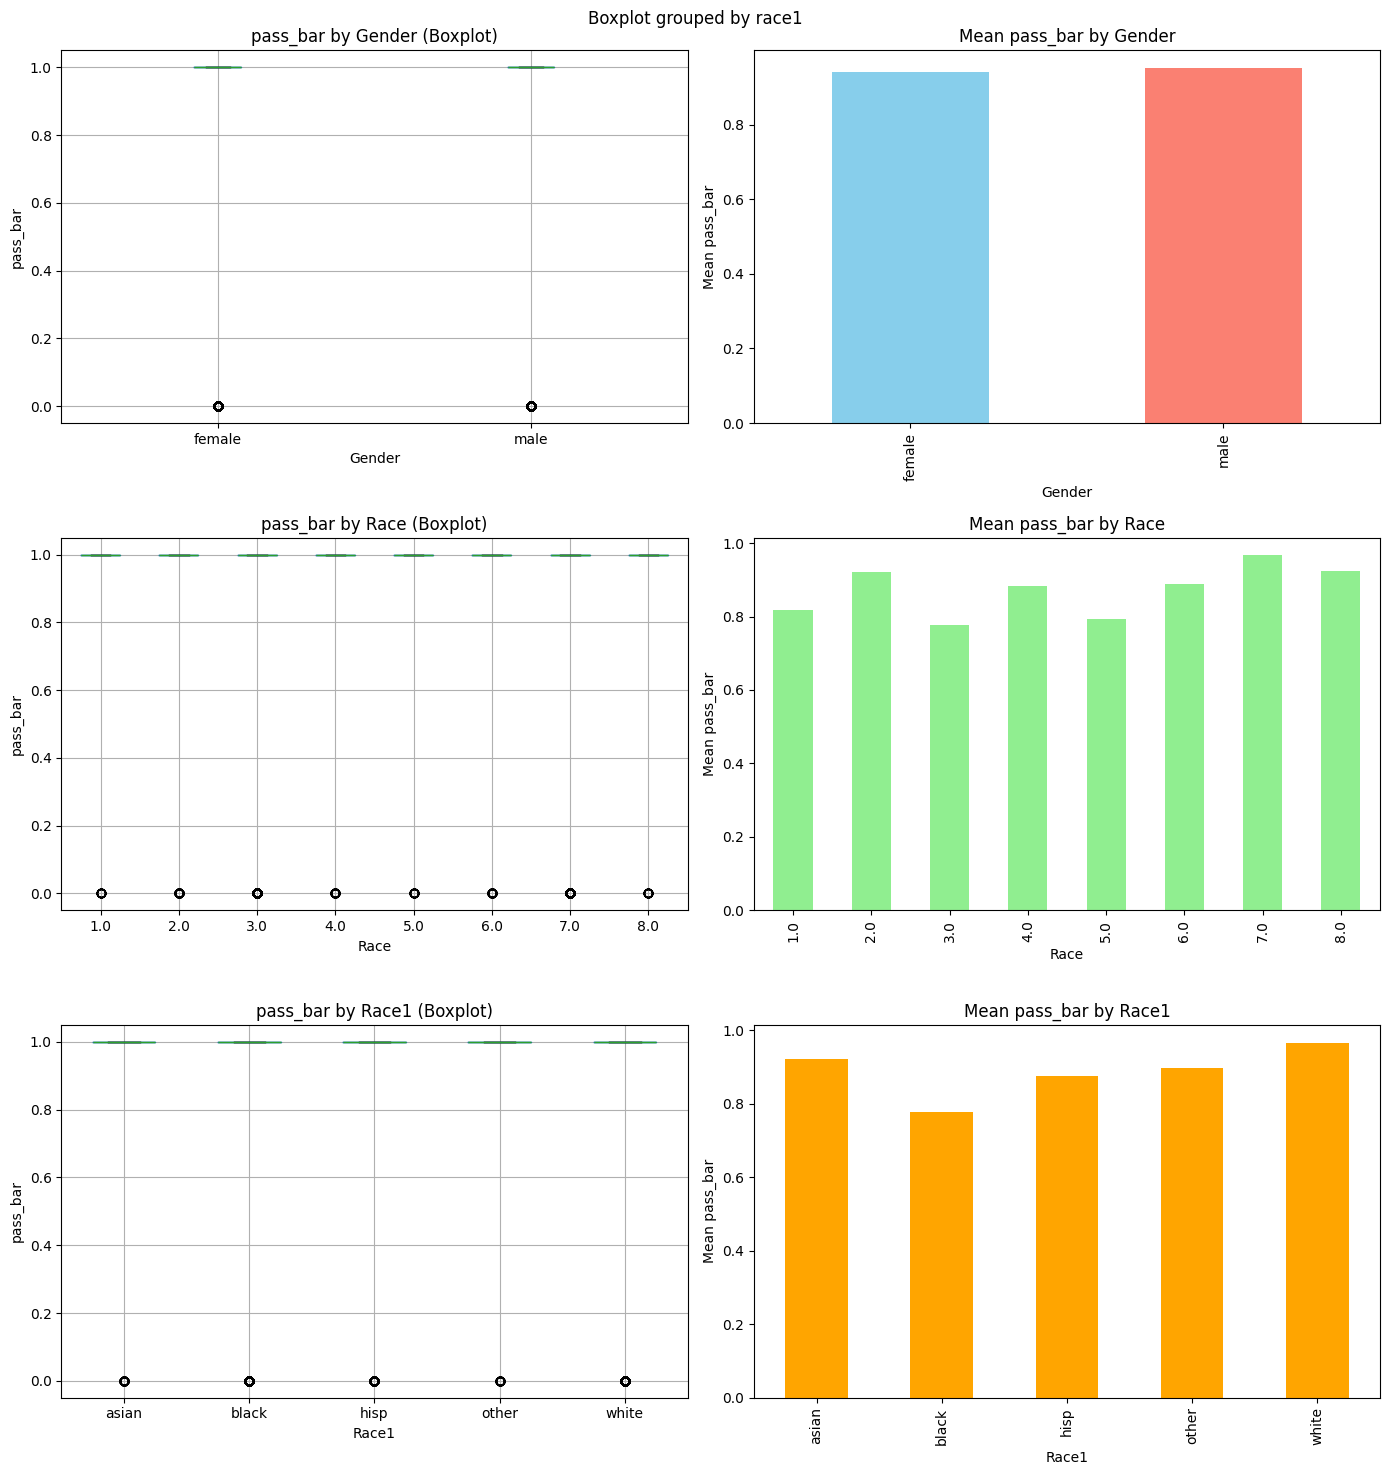

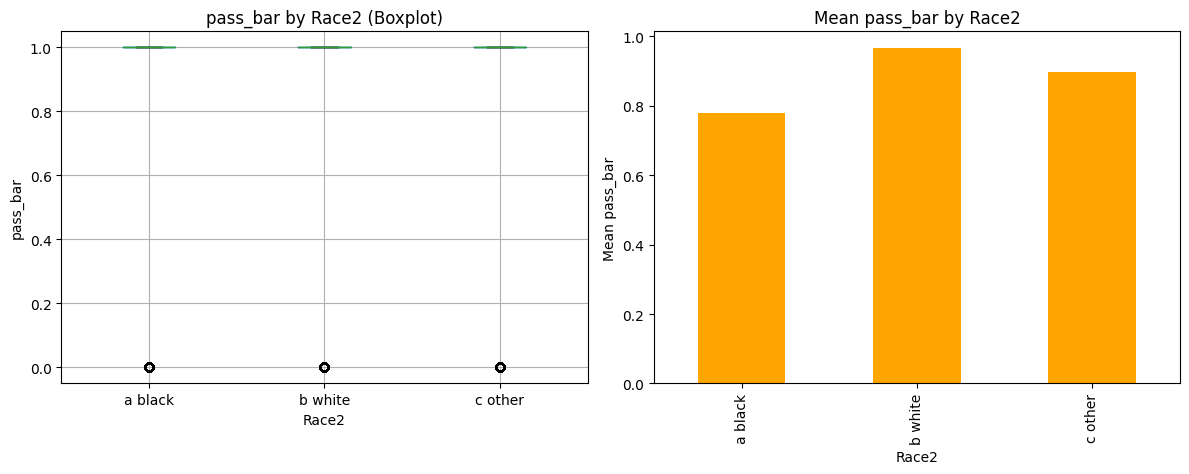

In [280]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Gender plots
df.boxplot(column='pass_bar', by='gender', ax=axs[0, 0])
axs[0, 0].set_title('pass_bar by Gender (Boxplot)')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('pass_bar')
axs[0, 0].figure.suptitle('')

df.groupby('gender')['pass_bar'].mean().plot(kind='bar', ax=axs[0, 1], color=['skyblue', 'salmon'])
axs[0, 1].set_title('Mean pass_bar by Gender')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Mean pass_bar')

# race (numeric) plots
df.boxplot(column='pass_bar', by='race', ax=axs[1, 0])
axs[1, 0].set_title('pass_bar by Race (Boxplot)')
axs[1, 0].set_xlabel('Race')
axs[1, 0].set_ylabel('pass_bar')

df.groupby('race')['pass_bar'].mean().plot(kind='bar', ax=axs[1, 1], color='lightgreen')
axs[1, 1].set_title('Mean pass_bar by Race')
axs[1, 1].set_xlabel('Race')
axs[1, 1].set_ylabel('Mean pass_bar')

# race1 (categorical) plots
df.boxplot(column='pass_bar', by='race1', ax=axs[2, 0])
axs[2, 0].set_title('pass_bar by Race1 (Boxplot)')
axs[2, 0].set_xlabel('Race1')
axs[2, 0].set_ylabel('pass_bar')

df.groupby('race1')['pass_bar'].mean().plot(kind='bar', ax=axs[2, 1], color='orange')
axs[2, 1].set_title('Mean pass_bar by Race1')
axs[2, 1].set_xlabel('Race1')
axs[2, 1].set_ylabel('Mean pass_bar')

plt.tight_layout()
plt.show()

# Separate plot for race2 (since axs[3, 0] does not exist in a 3x2 grid)
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='pass_bar', by='race2', ax=axs2[0])
axs2[0].set_title('pass_bar by Race2 (Boxplot)')
axs2[0].set_xlabel('Race2')
axs2[0].set_ylabel('pass_bar')
axs2[0].figure.suptitle('')

df.groupby('race2')['pass_bar'].mean().plot(kind='bar', ax=axs2[1], color='orange')
axs2[1].set_title('Mean pass_bar by Race2')
axs2[1].set_xlabel('Race2')
axs2[1].set_ylabel('Mean pass_bar')

plt.tight_layout()
plt.show()

# Dropping the columns that aren't needed in the modeling or that may cause data Leakage

In [281]:
df.drop(columns=['decile1b','decile3','decile1','Unnamed: 0','ID','bar', 'bar1', 'bar2', 'bar1_yr', 'bar2_yr','grad','Dropout' , 'dnn_bar_pass_prediction'], inplace=True)

In [282]:
modeling_data = df[['lsat', 'ugpa', 'gpa', 'age', 'sex', 'fam_inc', 
                    'parttime', 'fulltime', 'tier', 'cluster', 
                    'zfygpa', 'zgpa', 'pass_bar']]


In [283]:
modeling_data.head()

,lsat,ugpa,gpa,age,sex,fam_inc,parttime,fulltime,tier,cluster,zfygpa,zgpa,pass_bar
0,44.0,3.5,3.5,-62.0,1.0,5.0,0.0,1.0,4.0,1.0,1.33,1.88,1.0
1,29.0,3.5,3.5,-62.0,1.0,4.0,0.0,1.0,2.0,2.0,-0.11,-0.57,1.0
2,36.0,3.5,3.5,-58.0,2.0,1.0,0.0,1.0,3.0,3.0,-0.64,-1.12,1.0
3,39.0,3.5,3.5,-51.0,2.0,4.0,0.0,1.0,3.0,3.0,0.34,-0.49,1.0
4,48.0,3.5,3.5,-61.0,2.0,4.0,0.0,1.0,5.0,4.0,1.02,0.76,1.0


# fixing the age column

In [284]:
modeling_data['age'] = modeling_data['age'].abs()
modeling_data = modeling_data[(modeling_data['age'] >= 20) & (modeling_data['age'] <= 80)]


In [285]:
modeling_data['age'].describe()

count    22307.000000
mean        59.107634
std          5.193747
min         21.000000
25%         58.000000
50%         61.000000
75%         62.000000
max         69.000000
Name: age, dtype: float64

# Handling missing values and duplicates

In [286]:
modeling_data.isna().sum()

lsat           0
ugpa           0
gpa            0
age            0
sex            5
fam_inc      288
parttime      34
fulltime      34
tier          96
cluster       96
zfygpa       983
zgpa        1285
pass_bar       0
dtype: int64

In [287]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
modeling_data[['zfygpa', 'gpa', 'age','zgpa']] = knn_imputer.fit_transform(modeling_data[['zfygpa', 'gpa', 'age','zgpa']])

In [288]:
for col in ['sex', 'parttime', 'fulltime', 'tier' , 'cluster' , 'fam_inc']:
    mode_value = modeling_data[col].mode()[0]
    modeling_data[col].fillna(mode_value, inplace=True)

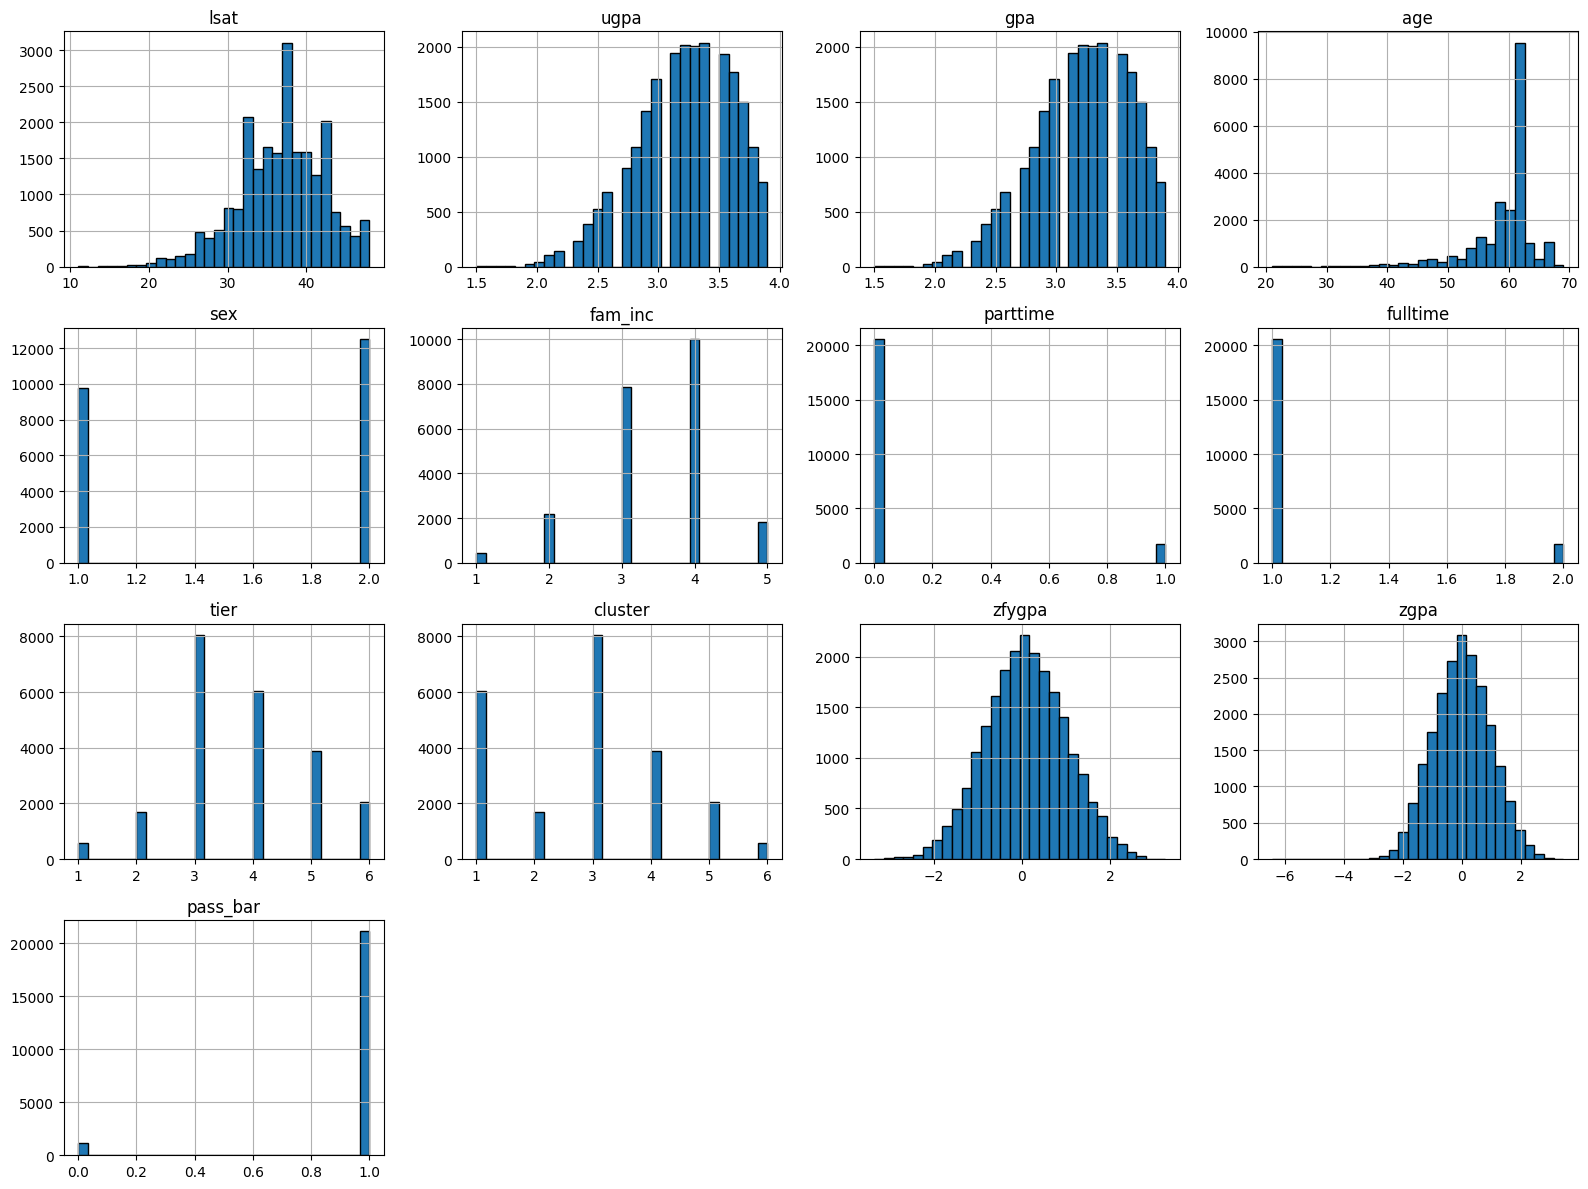

In [289]:
import matplotlib.pyplot as plt

modeling_data.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [290]:
modeling_data.drop_duplicates(inplace=True)

In [291]:
continous_columns = ['lsat', 'ugpa', 'gpa', 'age', 'zfygpa', 'zgpa']

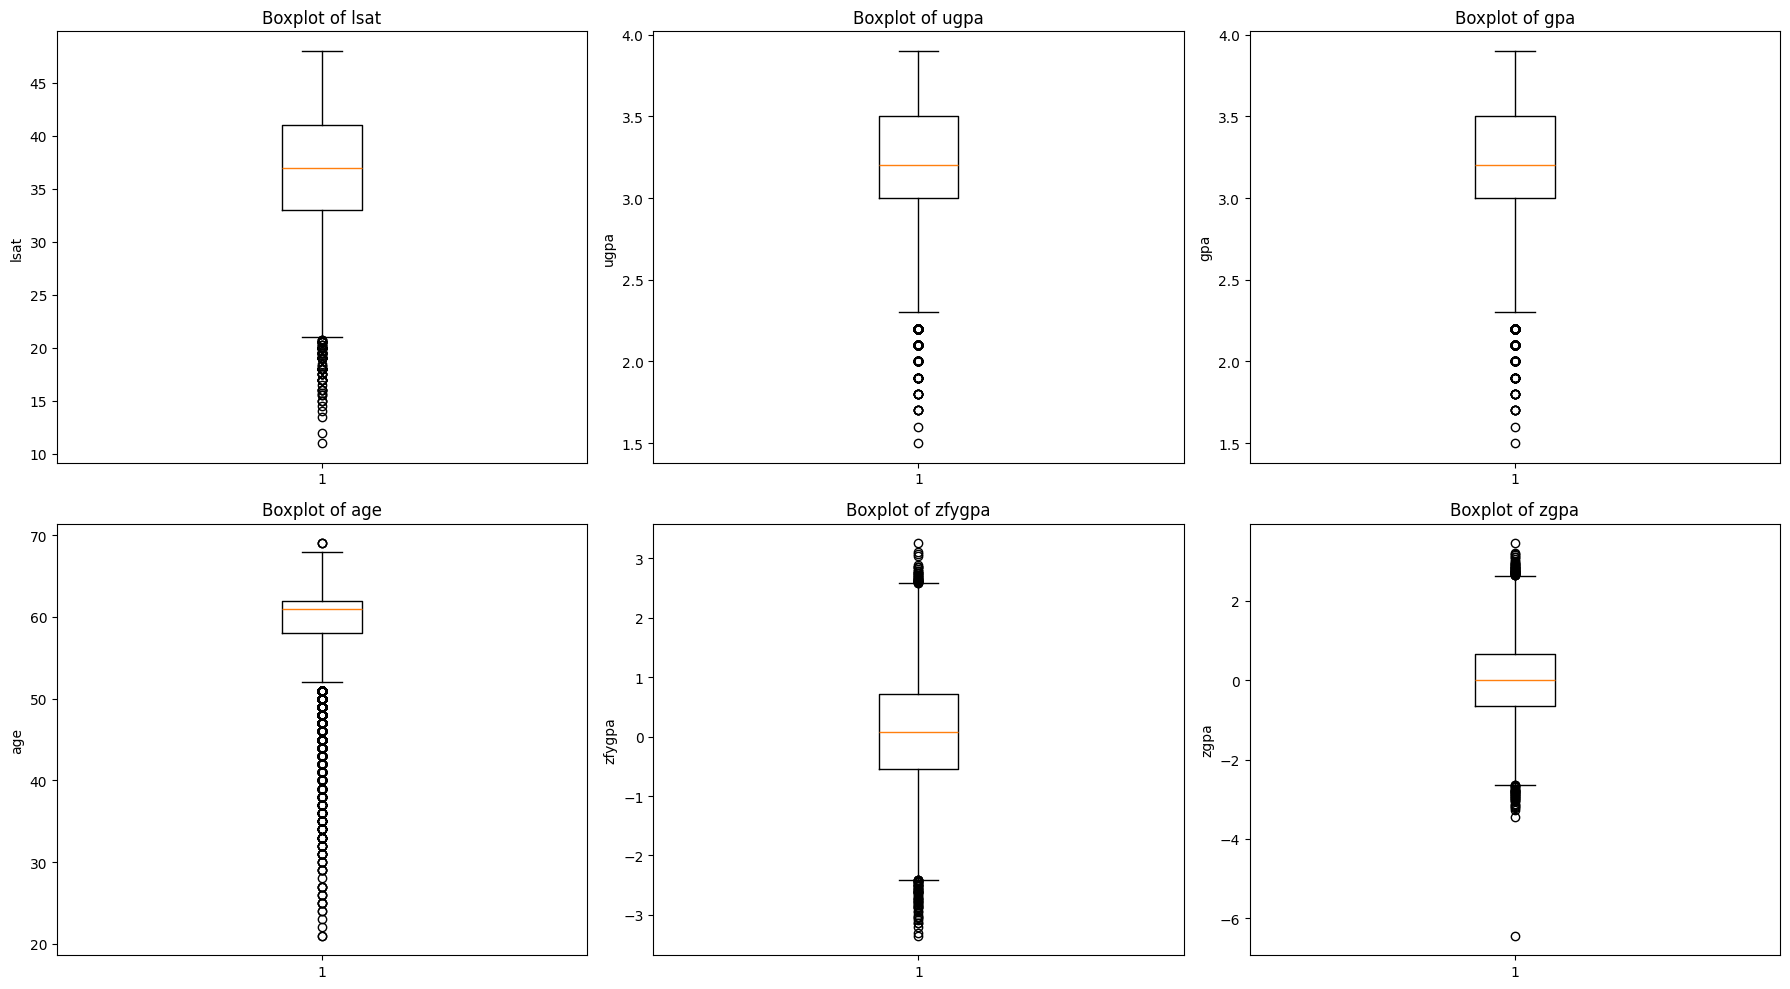

In [292]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(continous_columns):
    ax = axs[i // 3, i % 3]
    ax.boxplot(modeling_data[col], vert=True)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [293]:
outlier_counts = {}
for col in continous_columns:
    q1 = modeling_data[col].quantile(0.25)
    q3 = modeling_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = modeling_data[(modeling_data[col] < lower_bound) | (modeling_data[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts

{'lsat': 117, 'ugpa': 326, 'gpa': 326, 'age': 1898, 'zfygpa': 95, 'zgpa': 83}

In [294]:
modeling_data.shape

(22294, 13)

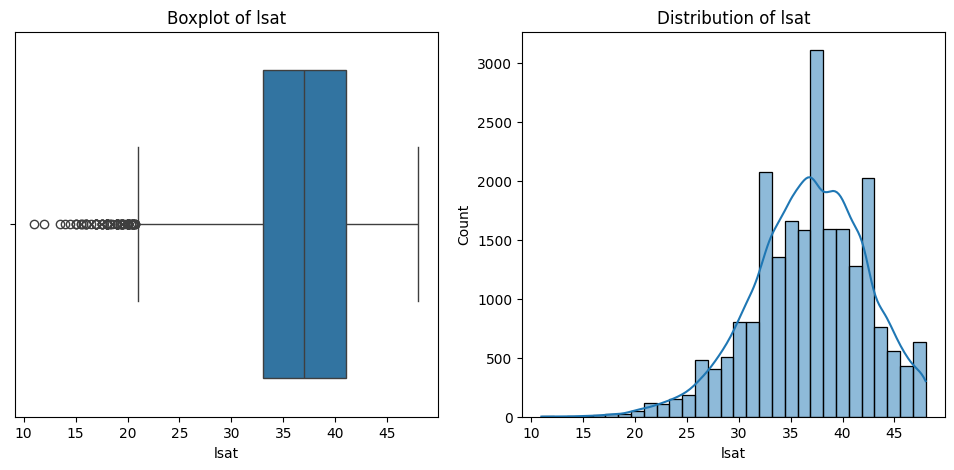


Column: lsat
Outliers count: 117
Lower bound: 21.0, Upper bound: 53.0
Sample outliers:
377     17.0
584     18.0
1039    18.0
1684    18.5
2374    19.0
3226    19.5
3477    20.5
3518    20.0
3924    18.0
3941    19.5
Name: lsat, dtype: float64



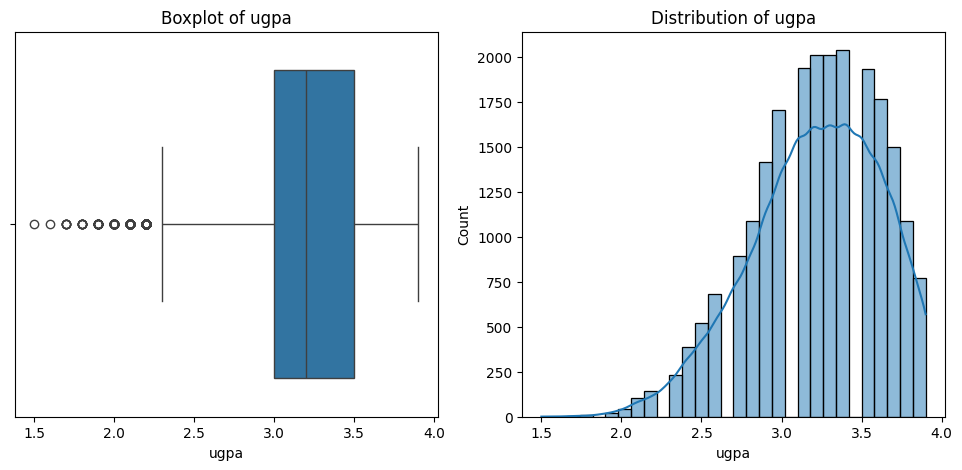


Column: ugpa
Outliers count: 326
Lower bound: 2.25, Upper bound: 4.25
Sample outliers:
6010    2.2
6011    2.2
6012    2.2
6013    2.2
6014    2.2
6015    2.2
6016    2.2
6017    2.2
6018    2.2
6019    2.2
Name: ugpa, dtype: float64



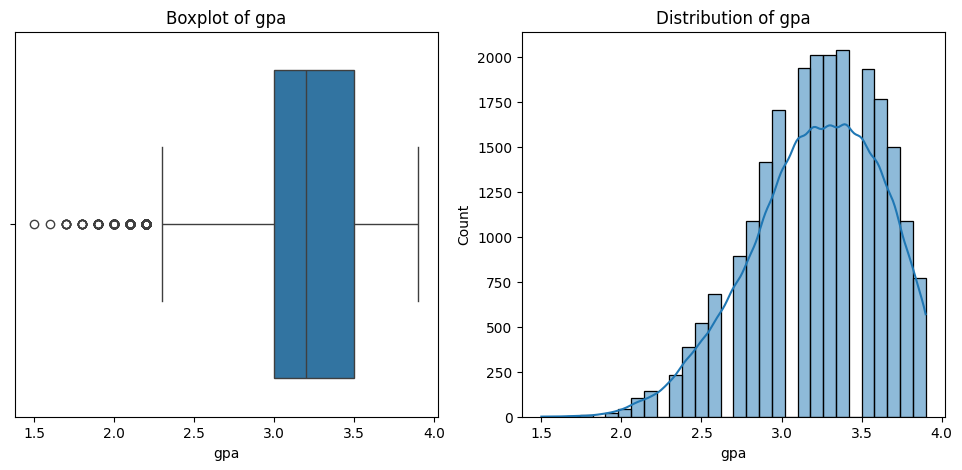


Column: gpa
Outliers count: 326
Lower bound: 2.25, Upper bound: 4.25
Sample outliers:
6010    2.2
6011    2.2
6012    2.2
6013    2.2
6014    2.2
6015    2.2
6016    2.2
6017    2.2
6018    2.2
6019    2.2
Name: gpa, dtype: float64



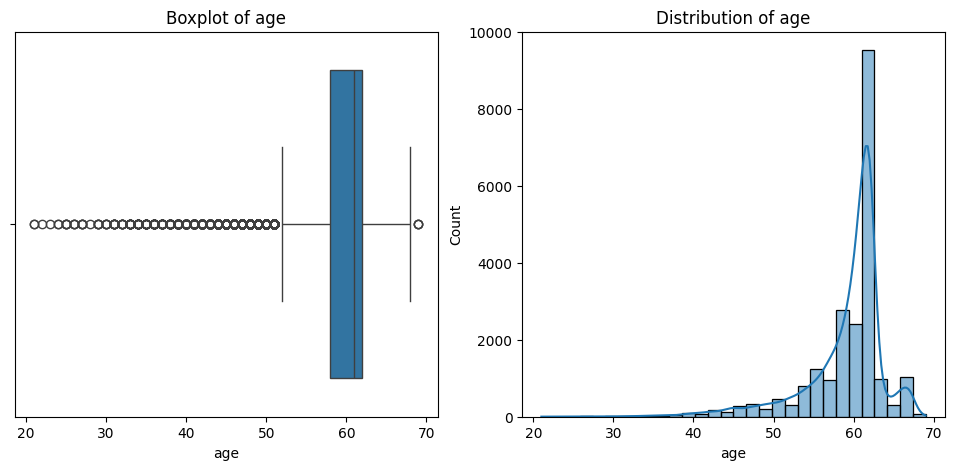


Column: age
Outliers count: 1898
Lower bound: 52.0, Upper bound: 68.0
Sample outliers:
3     51.0
7     48.0
29    44.0
30    49.0
39    48.0
41    51.0
42    47.0
63    44.0
73    47.0
81    47.0
Name: age, dtype: float64



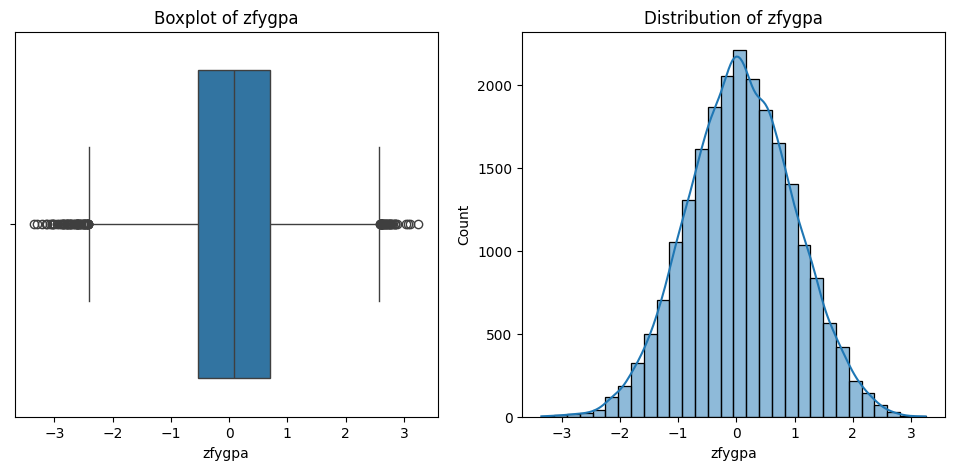


Column: zfygpa
Outliers count: 95
Lower bound: -2.415, Upper bound: 2.585
Sample outliers:
37      2.65
821     2.78
1147    2.85
1654   -2.42
1695   -2.86
1800    2.66
2048   -2.87
2510    2.88
2736   -2.64
2809    2.67
Name: zfygpa, dtype: float64



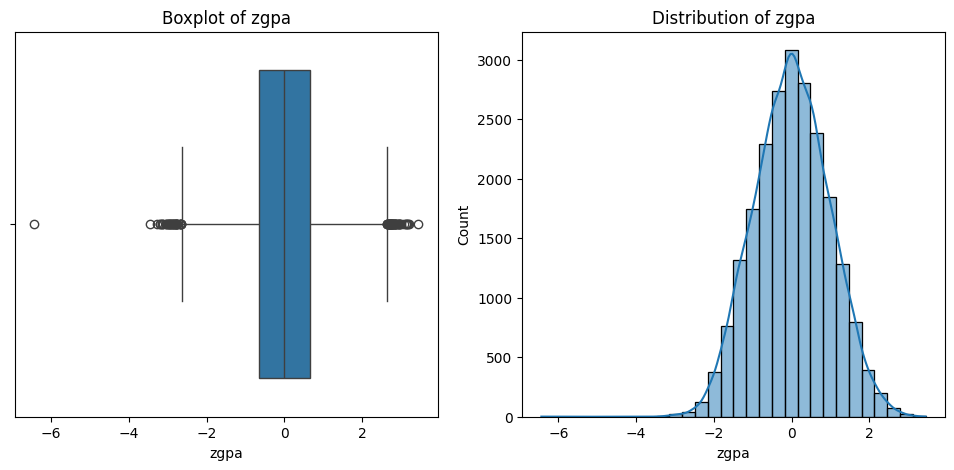


Column: zgpa
Outliers count: 83
Lower bound: -2.64, Upper bound: 2.64
Sample outliers:
29      3.15
679    -2.78
821     2.76
1059    2.83
1147    2.94
1537    3.12
1800    2.72
2130   -2.77
2191   -2.89
2809    2.72
Name: zgpa, dtype: float64



In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check
cols_to_check = ['lsat', 'ugpa', 'gpa', 'age', 'zfygpa', 'zgpa']

for col in cols_to_check:
    plt.figure(figsize=(12, 5))
    
    # Boxplot for outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(x=modeling_data[col])
    plt.title(f"Boxplot of {col}")
    
    # Histogram for distribution
    plt.subplot(1, 2, 2)
    sns.histplot(modeling_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    
    plt.show()
    
    # Detect outliers using IQR
    Q1 = modeling_data[col].quantile(0.25)
    Q3 = modeling_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = modeling_data[(modeling_data[col] < lower) | (modeling_data[col] > upper)][col]
    
    print(f"\nColumn: {col}")
    print(f"Outliers count: {len(outliers)}")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    print(f"Sample outliers:\n{outliers.head(10)}\n")


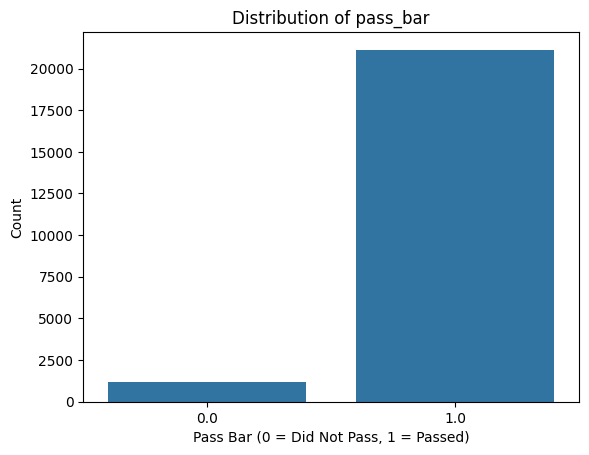

In [296]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='pass_bar', data=modeling_data)
plt.title('Distribution of pass_bar')
plt.xlabel('Pass Bar (0 = Did Not Pass, 1 = Passed)')
plt.ylabel('Count')
plt.show()

## Winsorize z-scores

In [297]:
import numpy as np

for col in ['zfygpa', 'zgpa']:
    upper = modeling_data[col].mean() + 3*modeling_data[col].std()
    lower = modeling_data[col].mean() - 3*modeling_data[col].std()
    modeling_data[col] = np.where(modeling_data[col] > upper, upper,
                                  np.where(modeling_data[col] < lower, lower, modeling_data[col]))
modeling_data.shape


(22294, 13)

In [298]:
modeling_data['gpa'] = modeling_data['gpa'].clip(lower=0, upper=4)
modeling_data['ugpa'] = modeling_data['ugpa'].clip(lower=0, upper=4)
modeling_data.shape


(22294, 13)

In [299]:
modeling_data.head()

,lsat,ugpa,gpa,age,sex,fam_inc,parttime,fulltime,tier,cluster,zfygpa,zgpa,pass_bar
0,44.0,3.5,3.5,62.0,1.0,5.0,0.0,1.0,4.0,1.0,1.33,1.88,1.0
1,29.0,3.5,3.5,62.0,1.0,4.0,0.0,1.0,2.0,2.0,-0.11,-0.57,1.0
2,36.0,3.5,3.5,58.0,2.0,1.0,0.0,1.0,3.0,3.0,-0.64,-1.12,1.0
3,39.0,3.5,3.5,51.0,2.0,4.0,0.0,1.0,3.0,3.0,0.34,-0.49,1.0
4,48.0,3.5,3.5,61.0,2.0,4.0,0.0,1.0,5.0,4.0,1.02,0.76,1.0


In [300]:
print("Age range:", modeling_data['age'].min(), modeling_data['age'].max())
print("LSAT range:", modeling_data['lsat'].min(), modeling_data['lsat'].max())


Age range: 21.0 69.0
LSAT range: 11.0 48.0


In [301]:

modeling_data['age'] = modeling_data['age'].clip(lower=20, upper=80)

Q1 = modeling_data['lsat'].quantile(0.25)
Q3 = modeling_data['lsat'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

modeling_data['lsat'] = modeling_data['lsat'].clip(lower=lower, upper=upper)


In [302]:
modeling_data.shape


(22294, 13)

In [303]:
modeling_data.head()

,lsat,ugpa,gpa,age,sex,fam_inc,parttime,fulltime,tier,cluster,zfygpa,zgpa,pass_bar
0,44.0,3.5,3.5,62.0,1.0,5.0,0.0,1.0,4.0,1.0,1.33,1.88,1.0
1,29.0,3.5,3.5,62.0,1.0,4.0,0.0,1.0,2.0,2.0,-0.11,-0.57,1.0
2,36.0,3.5,3.5,58.0,2.0,1.0,0.0,1.0,3.0,3.0,-0.64,-1.12,1.0
3,39.0,3.5,3.5,51.0,2.0,4.0,0.0,1.0,3.0,3.0,0.34,-0.49,1.0
4,48.0,3.5,3.5,61.0,2.0,4.0,0.0,1.0,5.0,4.0,1.02,0.76,1.0


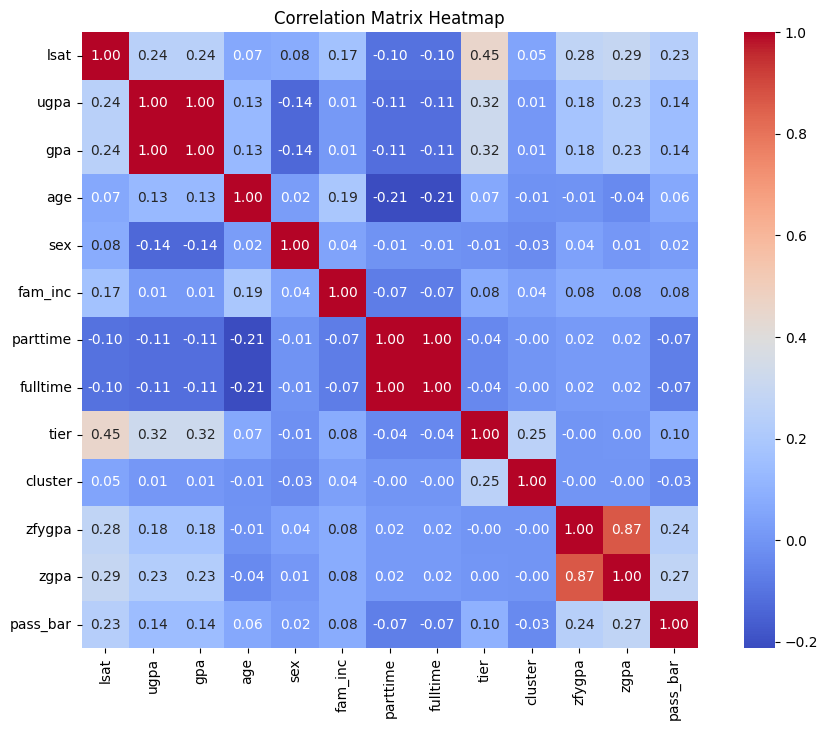

In [304]:
import seaborn as sns

import matplotlib.pyplot as plt

corr_matrix = modeling_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [305]:
corr_matrix

,lsat,ugpa,gpa,age,sex,fam_inc,parttime,fulltime,tier,cluster,zfygpa,zgpa,pass_bar
lsat,1.000000,0.242895,0.242895,0.065820,0.076560,0.169409,-0.104052,-0.104052,0.451669,0.050619,0.275093,0.290478,0.234351
ugpa,0.242895,1.000000,1.000000,0.132182,-0.135706,0.012480,-0.114310,-0.114310,0.321264,0.008115,0.177857,0.226875,0.142896
gpa,0.242895,1.000000,1.000000,0.132182,-0.135706,0.012480,-0.114310,-0.114310,0.321264,0.008115,0.177857,0.226875,0.142896
age,0.065820,0.132182,0.132182,1.000000,0.024253,0.190156,-0.212711,-0.212711,0.066494,-0.011868,-0.006459,-0.037267,0.062094
sex,0.076560,-0.135706,-0.135706,0.024253,1.000000,0.043822,-0.006880,-0.006880,-0.014756,-0.028362,0.043060,0.005360,0.021832
fam_inc,0.169409,0.012480,0.012480,0.190156,0.043822,1.000000,-0.071878,-0.071878,0.079274,0.038012,0.078999,0.079078,0.077121
parttime,-0.104052,-0.114310,-0.114310,-0.212711,-0.006880,-0.071878,1.000000,1.000000,-0.040249,-0.001279,0.019338,0.015688,-0.066492
fulltime,-0.104052,-0.114310,-0.114310,-0.212711,-0.006880,-0.071878,1.000000,1.000000,-0.040249,-0.001279,0.019338,0.015688,-0.066492
tier,0.451669,0.321264,0.321264,0.066494,-0.014756,0.079274,-0.040249,-0.040249,1.000000,0.251700,-0.002208,0.001307,0.099353
cluster,0.050619,0.008115,0.008115,-0.011868,-0.028362,0.038012,-0.001279,-0.001279,0.251700,1.000000,-0.001736,-0.003198,-0.034636


# Splitting Data

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier

In [307]:


X = modeling_data.drop(columns=['pass_bar'])
y = modeling_data['pass_bar']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [308]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [309]:
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train_scaled, y_train)

print("Original distribution:", y_train.value_counts().to_dict())
print("Resampled distribution:", y_resampled.value_counts().to_dict())

Original distribution: {1.0: 16905, 0.0: 930}
Resampled distribution: {1.0: 16874, 0.0: 16874}


# Modeling

In [310]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["XGB_DISABLE_STRICT_WARNING"] = "1"


In [311]:
from sklearn.model_selection import GridSearchCV


# Calculate scale_pos_weight from original training set
neg, pos = np.bincount(y_train.astype(int))
scale = neg / pos

# Define base model
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='aucpr',
    random_state=42,
    scale_pos_weight=scale
)

# Define parameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 3-fold CV
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
       
)


# Fit on resampled data
grid_search.fit(X_resampled, y_resampled)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)

best_xgb = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_xgb.predict(X_test_scaled)
y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}
Best ROC-AUC: 0.9938072200125272
Test Accuracy: 0.870374523435748
Test ROC-AUC: 0.8387622910695897

Classification Report:
              precision    recall  f1-score   support

         0.0     0.2149    0.5579    0.3103       233
         1.0     0.9733    0.8876    0.9285      4226

    accuracy                         0.8704      4459
   macro avg     0.5941    0.7228    0.6194      4459
weighted avg     0.9336    0.8704    0.8962      4459



The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


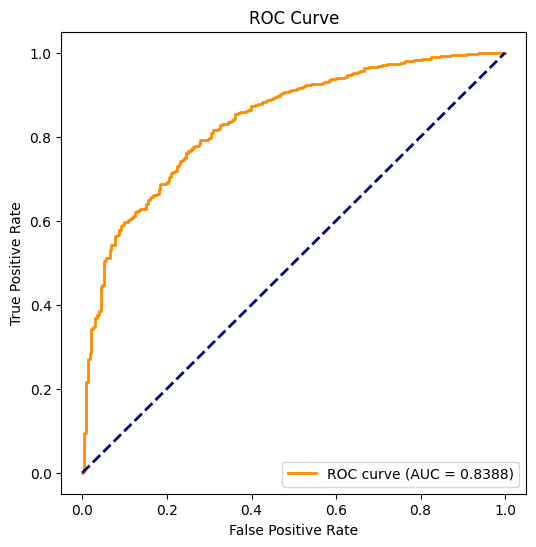

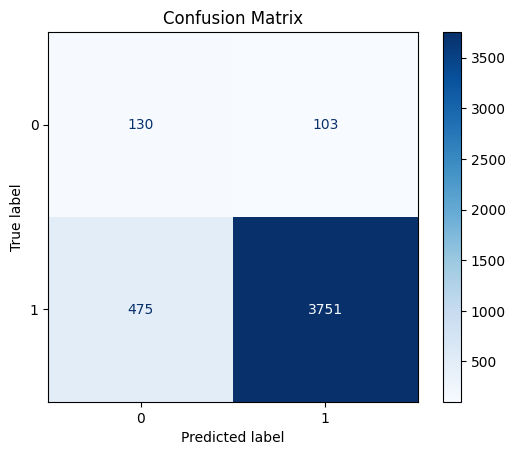

In [312]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [313]:
!pip install fairlearn

Defaulting to user installation because normal site-packages is not writeable


In [320]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score, recall_score

metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'selection_rate': selection_rate
}

# List of sensitive features
sensitive_features = ['sex', 'gender', 'race', 'race1', 'race2', 'asian', 'black', 'hisp', 'other']

def check_fairness(sensitive_feature, feature_name):
    metric_frame = MetricFrame(
        metrics=metrics,
        y_true=y_test,
        y_pred=y_pred,
        sensitive_features=X_test[sensitive_feature]  # take from original X_test
    )
    
    print(f"\n=== Fairness metrics by {feature_name} ===")
    display(metric_frame.by_group)
    print("\nOverall metrics:")
    display(metric_frame.overall)
    print("\nDisparities (max - min across groups):")
    display(metric_frame.difference())
    print("="*70)

for col in sensitive_features:
    if col in X_test.columns:
        check_fairness(col, col.capitalize())



=== Fairness metrics by Sex ===


,accuracy,recall,selection_rate
sex,,,
1.0,0.866229,0.883646,0.856133
2.0,0.873688,0.890724,0.870864



Overall metrics:


accuracy          0.870375
recall            0.887601
selection_rate    0.864319
dtype: float64


Disparities (max - min across groups):


accuracy          0.007459
recall            0.007078
selection_rate    0.014730
dtype: float64

## 📌 Discussion: Bias, Fairness, and Ethical Implications in Our Project

During this project, we explored the process of building a machine learning model to predict bar passage outcomes. While the technical pipeline involved preprocessing, handling imbalance, and tuning an XGBoost classifier, the most critical issue we encountered was **bias and fairness**.

### ⚖️ Bias in the Dataset
- Some features (such as *tier* or *cluster*) carried a high risk of introducing **bias** because they may encode sensitive or proxy information about socioeconomic or demographic backgrounds.
- Including such features could lead the model to make predictions not based on merit (like LSAT or GPA), but instead on indirect group membership. This creates **unfair advantages or disadvantages** for certain groups.

### 🚫 Why We Removed Some Features
- To mitigate bias, we deliberately excluded columns that might cause **data leakage** or reinforce existing social inequalities.
- For example, while *LSAT* and *GPA* are legitimate academic performance indicators, features like *tier* could disproportionately reflect institutional prestige rather than individual ability.
- Removing such features ensures our model focuses on **fair predictors** rather than social proxies.

### ⚖️ Fairness and Imbalanced Classes
- We also faced a major class imbalance: very few students who failed compared to those who passed.
- If left unaddressed, the model would be biased toward predicting "pass" almost always.
- To handle this, we used **SMOTE** oversampling and also experimented with **scale_pos_weight** in XGBoost, improving the model's ability to recognize the minority class.

### 🌍 Ethical Considerations
- **Fairness in machine learning** is not just a technical challenge but also an **ethical responsibility**.  
- Models used in high-stakes decisions (like law school outcomes) must not reinforce structural inequalities.
- Without fairness checks, ML can unintentionally **amplify discrimination**—for instance, by disadvantaging candidates from less prestigious institutions.

### ✅ Key Takeaways
1. **Data preprocessing is not neutral**: choosing what to keep/remove is a fairness decision.
2. **Bias in features → Bias in predictions**: carefully assess features for potential ethical risks.
3. **Address imbalance**: otherwise, the model may ignore minority outcomes.
4. **Transparent reporting**: always document what was done to improve fairness and why.

### 🔮 Looking Ahead
- In production, fairness monitoring should continue: e.g., tracking model outcomes across different groups.
- Explainability techniques (like SHAP) can be applied to understand if the model is relying too much on sensitive proxies.
- The ultimate goal is to ensure predictions support **equitable and ethical decision-making**.

---
